In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import image_utils
from time import sleep
from keras.preprocessing import image

2023-12-05 22:20:31.048836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## Load Model

In [4]:
emotion_model=load_model('Emotion_Detection_CNN_50epochs.h5')

In [5]:
age_model=load_model('Age_Detection_CNN_05epochs.h5')

In [6]:
gender_model = load_model('Gender_Detection_CNN_4epochs.h5')

In [7]:
mask_model=load_model('facemask_detector_7epochs.h5')

In [8]:
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [9]:
gender_labels=['Male','Female']

In [10]:
mask_labels=['Mask not Detected','Mask detected']

In [17]:
cap=cv2.VideoCapture(0)
# unique_id=set()
while True:
    ret,frame=cap.read()
    labels=[]
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)
    print('faces',faces,len(faces))
    track_id=len(faces)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        #Emotion
        roi=roi_gray.astype('float')/255.0  #Scale
        roi=image_utils.img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)  #Expand dims to get it ready for prediction (1, 48, 48, 1)

        preds=emotion_model.predict(roi)[0]  #Yields one hot encoded result for 7 classes
        label=class_labels[preds.argmax()]  #Find the label
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        #Gender
        roi_color=frame[y:y+h,x:x+w]
        roi_color=cv2.resize(roi_color,(200,200),interpolation=cv2.INTER_AREA)
        gender_predict = gender_model.predict(np.array(roi_color).reshape(-1,200,200,3))
        gender_predict = (gender_predict>= 0.5).astype(int)[:,0]
        gender_label=gender_labels[gender_predict[0]] 
        gender_label_position=(x,y+h+50) #50 pixels below to move the label outside the face
        cv2.putText(frame,gender_label,gender_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        #Age
        roi_color=roi_color/255
        age_predict = age_model.predict(np.array(roi_color).reshape(1,200,200,3))
        age = np.round(age_predict[0,0])
        age_label_position=(x+h,y+h)
        cv2.putText(frame,"Age="+str(age),age_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        #mask
        roi_color=frame[y:y+h,x:x+w]
        roi_color=cv2.resize(roi_color,(224,224),interpolation=cv2.INTER_AREA)
        mask_predict = mask_model.predict(np.array(roi_color).reshape(-1,224,224,3))
        mask_predict = (mask_predict>=0.5).astype(int)[:,0]
        mask_label=mask_labels[gender_predict[0]] 
        mask_label_position=(x+50,y+50) #50 pixels below to move the label outside the face
        cv2.putText(frame,mask_label,mask_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        cv2.putText(frame,'Person count is'+str(track_id),(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        

        
        
   
    cv2.imshow('Emotion Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

faces () 0
faces [[431 298 330 330]] 1
1/1 [==============================] - 0s 285ms/step
faces [[443 306 314 314]] 1
1/1 [==============================] - 0s 260ms/step
faces [[443 307 321 321]] 1
1/1 [==============================] - 0s 256ms/step
faces [[450 286 336 336]] 1
1/1 [==============================] - 0s 258ms/step
faces [[442 289 338 338]] 1
1/1 [==============================] - 0s 275ms/step
faces [[435 293 336 336]] 1
1/1 [==============================] - 0s 256ms/step
faces [[374 280 335 335]] 1
1/1 [==============================] - 0s 256ms/step
faces [[146 220 360 360]] 1
1/1 [==============================] - 0s 303ms/step
faces () 0
faces [[  7 124 331 331]] 1
1/1 [==============================] - 0s 255ms/step
faces [[ 27 118 373 373]] 1
1/1 [==============================] - 0s 255ms/step
faces [[673 116 317 317]
 [ 66 129 383 383]] 2
1/1 [==============================] - 0s 255ms/step
faces [[165 242 349 349]] 1
1/1 [==============================] - 0

1/1 [==============================] - 0s 257ms/step
faces [[297 279 325 325]
 [836 282 332 332]] 2
1/1 [==============================] - 0s 260ms/step
faces [[297 282 323 323]
 [830 285 330 330]] 2
1/1 [==============================] - 0s 256ms/step
faces [[286 277 335 335]
 [827 299 324 324]] 2
1/1 [==============================] - 0s 278ms/step
faces [[308 296 319 319]
 [823 318 317 317]] 2
1/1 [==============================] - 0s 256ms/step
faces [[286 289 350 350]
 [822 320 322 322]] 2
1/1 [==============================] - 0s 257ms/step
faces [[284 285 358 358]
 [825 313 325 325]] 2
1/1 [==============================] - 0s 257ms/step
faces [[292 297 340 340]
 [848 316 302 302]] 2
1/1 [==============================] - 0s 255ms/step
faces [[286 291 328 328]
 [838 310 321 321]] 2
1/1 [==============================] - 0s 252ms/step
faces [[288 296 321 321]
 [866 310 309 309]] 2
1/1 [==============================] - 0s 257ms/step
faces [[293 302 310 310]
 [865 297 338 338]] 2


1/1 [==============================] - 0s 259ms/step
faces [[ 29 202 334 334]
 [547 249 261 261]
 [837 360 161 161]] 3
1/1 [==============================] - 0s 258ms/step
faces [[549 240 265 265]
 [ 21 204 314 314]
 [833 350 159 159]] 3
1/1 [==============================] - 0s 282ms/step
faces [[547 215 257 257]
 [836 306 177 177]] 2
1/1 [==============================] - 0s 255ms/step
faces [[565 235 257 257]] 1
1/1 [==============================] - 0s 256ms/step
faces [[585 220 264 264]] 1
1/1 [==============================] - 0s 260ms/step
faces [[ 573  192  268  268]
 [1049  250  181  181]] 2
1/1 [==============================] - 0s 254ms/step
faces [[632  44 293 293]] 1
1/1 [==============================] - 0s 254ms/step
faces [[598 135 305 305]
 [ 21 156 348 348]] 2
1/1 [==============================] - 0s 252ms/step
faces [[637 180 274 274]
 [ 35 160 380 380]] 2
1/1 [==============================] - 0s 254ms/step
faces [[138 226 360 360]
 [727 251 271 271]] 2
1/1 [======

1/1 [==============================] - 0s 257ms/step
faces [[757  81 277 277]
 [313 295 389 389]] 2
1/1 [==============================] - 0s 262ms/step
faces [[810  75 291 291]
 [338 248 398 398]] 2
1/1 [==============================] - 0s 257ms/step
faces [[846 139 288 288]
 [327 243 405 405]] 2
1/1 [==============================] - 0s 257ms/step
faces [[366 243 384 384]
 [848 278 230 230]] 2
1/1 [==============================] - 0s 255ms/step
faces [[392 242 404 404]
 [873 297 228 228]] 2
1/1 [==============================] - 0s 257ms/step
faces [[395 235 428 428]
 [905 291 247 247]] 2
1/1 [==============================] - 0s 253ms/step
faces [[387 229 385 385]
 [777 291 269 269]] 2
1/1 [==============================] - 0s 255ms/step
faces [[387 237 387 387]
 [815 305 257 257]] 2
1/1 [==============================] - 0s 261ms/step
faces [[797 295 276 276]
 [411 247 381 381]] 2
1/1 [==============================] - 0s 256ms/step
faces [[398 205 414 414]
 [793 297 268 268]] 2


1/1 [==============================] - 0s 256ms/step
faces [[321 209 428 428]
 [727 243 311 311]] 2
1/1 [==============================] - 0s 254ms/step
faces [[286 177 464 464]
 [744 265 291 291]] 2
1/1 [==============================] - 0s 324ms/step
faces [[343 154 438 438]
 [774 278 284 284]] 2
1/1 [==============================] - 0s 254ms/step
faces [[352 169 410 410]
 [783 299 288 288]] 2
1/1 [==============================] - 0s 256ms/step
faces [[783 295 282 282]] 1
1/1 [==============================] - 0s 252ms/step
faces [[787 290 284 284]] 1
1/1 [==============================] - 0s 258ms/step
faces [[393 200 424 424]
 [787 288 288 288]] 2
1/1 [==============================] - 0s 259ms/step
faces [[354 190 434 434]
 [787 294 288 288]] 2
1/1 [==============================] - 0s 259ms/step
faces [[737 232 249 249]
 [336 187 432 432]] 2
1/1 [==============================] - 0s 255ms/step
faces [[350 175 416 416]
 [743 228 271 271]] 2
1/1 [==============================] -

faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces [[337 279 373 373]] 1
1/1 [==============================] - 0s 253ms/step
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces () 0
faces [[494 409 293 293]] 1
1/1 [==============================] - 0s 258ms/step


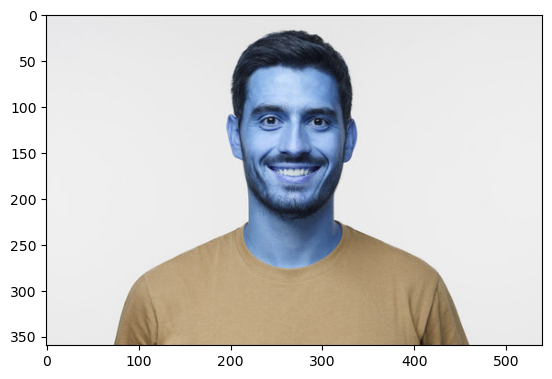

In [12]:
img=cv2.imread('mask2.jpeg')
plt.imshow(img)

In [13]:
def detect(img):
    frame=img
    labels=[]

    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)
    print('faces',faces,len(faces))
    track_id=len(faces)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        #Get image ready for prediction
        roi=roi_gray.astype('float')/255.0  #Scale
        roi=image_utils.img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)  #Expand dims to get it ready for prediction (1, 48, 48, 1)

        preds=emotion_model.predict(roi)[0]  #Yields one hot encoded result for 7 classes
        label=class_labels[preds.argmax()]  #Find the label
        label_position=(x-h+50,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)

        #Gender
        roi_color=frame[y:y+h,x:x+w]
        roi_color=cv2.resize(roi_color,(200,200),interpolation=cv2.INTER_AREA)
        gender_predict = gender_model.predict(np.array(roi_color).reshape(-1,200,200,3))
        gender_predict = (gender_predict>= 0.5).astype(int)[:,0]
        gender_label=gender_labels[gender_predict[0]] 
        gender_label_position=(x,y+h+50) #50 pixels below to move the label outside the face
        cv2.putText(frame,gender_label,gender_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

        #Age
        roi_color=roi_color/255
        age_predict = age_model.predict(np.array(roi_color).reshape(1,200,200,3))
        age = np.round(age_predict[0,0])
        age_label_position=(x+h,y+h)
        cv2.putText(frame,"Age="+str(age),age_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)

        #mask
        roi_color=frame[y:y+h,x:x+w]
        roi_color=cv2.resize(roi_color,(224,224),interpolation=cv2.INTER_AREA)
        mask_predict = mask_model.predict(np.array(roi_color).reshape(-1,224,224,3))
        mask_predict = (mask_predict>=0.5).astype(int)[:,0]
        mask_label=mask_labels[gender_predict[0]] 
        mask_label_position=(x,y+20) #50 pixels below to move the label outside the face
        cv2.putText(frame,mask_label,mask_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2)

        cv2.putText(frame,'Person count is'+str(track_id),(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)


    plt.imshow(frame)


faces [[194  56 150 150]] 1
1/1 [==============================] - 0s 251ms/step


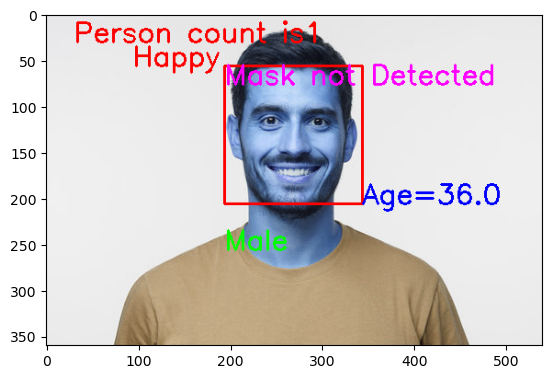

In [14]:
detect(img)

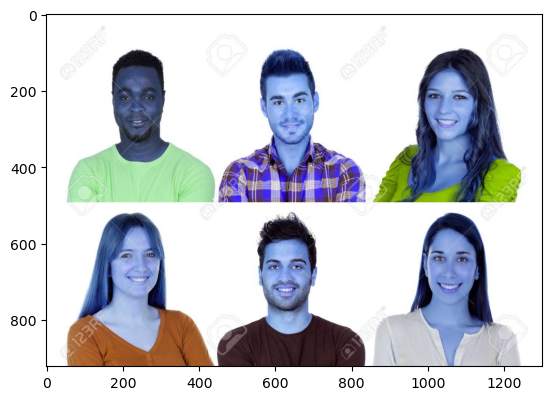

In [15]:
img1=cv2.imread('k.jpeg')
plt.imshow(img1)

faces [[157 156 157 157]
 [974 162 155 155]
 [545 155 183 183]
 [163 578 148 148]
 [976 576 171 171]
 [547 597 162 162]] 6
1/1 [==============================] - 0s 252ms/step


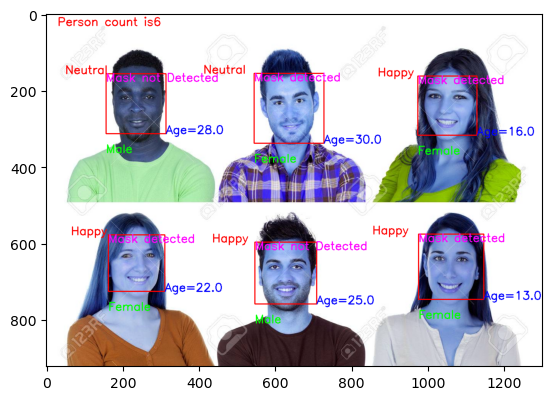

In [16]:
detect(img1)